In [50]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("../Josh/EnergyAndAvgWeather.csv")

In [83]:
temp = pd.DataFrame(df, columns=['temp'])
price = pd.DataFrame(df, columns=['price actual'])
temp.dropna(inplace=True)
price.dropna(inplace=True)
temp.shape, price.shape

((32346, 1), (32346, 1))

In [87]:
price.describe()

,price actual
count,32346.000000
mean,57.651638
std,11.947457
min,13.554000
25%,50.594500
50%,58.050000
75%,66.136000
max,99.516000


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp, price = scaler.fit_transform(temp), scaler.fit_transform(price)

In [72]:
from sklearn.model_selection import train_test_split

# Split the data by a 80:20 ratio
temp_train, temp_test, price_train, price_test = train_test_split(
    temp, price, test_size=0.2, random_state=5
)

In [73]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(temp_train, price_train.ravel())

RandomForestRegressor()

In [74]:
price_train_pred = forest_regressor.predict(temp_train)

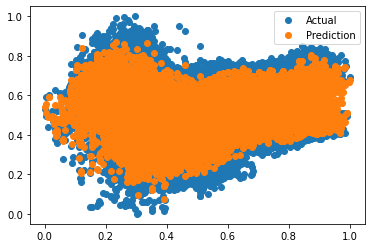

In [75]:
plt.plot(temp_train, price_train, marker="o", linestyle="", label="Actual")
plt.plot(temp_train, price_train_pred, marker="o", linestyle="", label="Prediction")
plt.legend()

In [76]:
from sklearn.metrics import mean_squared_error

print(
    "Training RMSE: %.3f"
    % mean_squared_error(price_train, price_train_pred, squared=False)
)

Training RMSE: 0.085


In [77]:
print(
    "Unscaled Training RMSE: %.3f"
    % mean_squared_error(
        scaler.inverse_transform(price_train),
        scaler.inverse_transform(price_train_pred.reshape(-1, 1)),
        squared=False,
    )
)

Unscaled Training RMSE: 7.326


In [78]:
price_test_pred = forest_regressor.predict(temp_test)

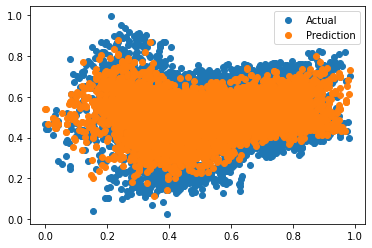

In [79]:
plt.plot(temp_test, price_test, marker="o", linestyle="", label="Actual")
plt.plot(temp_test, price_test_pred, marker="o", linestyle="", label="Prediction")
plt.legend()

In [80]:
print(
    "Testing RMSE: %.3f"
    % mean_squared_error(price_test, price_test_pred, squared=False)
)

Testing RMSE: 0.160


In [81]:
print(
    "Unscaled Testing RMSE: %.3f"
    % mean_squared_error(
        scaler.inverse_transform(price_test),
        scaler.inverse_transform(price_test_pred.reshape(-1, 1)),
        squared=False,
    )
)

Unscaled Testing RMSE: 13.753
